# 3 Daten visualisieren

In [2]:
import requests
import json
import pandas as pd
import geopandas as gpd
import os
import fnmatch

In [3]:
import networkx as nx
import osmnx as ox
import numpy as np
from shapely.geometry import Point, LineString, Polygon
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [4]:
path = "Daten/out"
#patternsRosengarten = ["*Rosengarten*2*.geojson", "*Rosengarten*3*.geojson","*Rosengarten*4*.geojson","*Rosengarten*5*.geojson"]
#patternsWasserwerk = ['*Wasserwerk*2*.geojson', '*Wasserwerk*3*.geojson', '*Wasserwerk*4*.geojson', '*Wasserwerk*5*.geojson']
#patternsAlbisrieden = ['*Albisriederplatz*2*.geojson', '*Albisriederplatz*3*.geojson', '*Albisriederplatz*4*.geojson', '*Albisriederplatz*5*.geojson']

In [5]:
#def readGdfs(pattern, path):
 #   gdfs = []
  #  for file in os.listdir(path):
        #if fnmatch.fnmatch(file, pattern):
   #         gdfNew = gpd.read_file(path + "/" + file)
   #         gdfNew = gdfNew.to_crs(epsg=21781)
   #         gdfs.append(gdfNew)
   # return gdfs

In [6]:
#for pattern in patternsRosengarten:
#    gdfsRosengarten = readGdfs(pattern, path)
#for pattern in patternsWasserwerk: 
#    gdfsWasserwerk = readGdfs(pattern, path)
#for pattern in patternsAlbisrieden: 
#    gdfsAlbisrieden = readGdfs(pattern, path)


In [7]:
#gdfsRosengarten[0]

In [8]:
gdfsRosengarten2 = []
gdfsWasserwerk2 = []
gdfsAlbisrieden2 = []

In [9]:
    for file in os.listdir(path):
        if fnmatch.fnmatch(file, '*Rosengarten*2*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsRosengarten2.append(gdfNew)
        elif fnmatch.fnmatch(file, '*Wasserwerk*2*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsWasserwerk2.append(gdfNew)
        elif fnmatch.fnmatch(file, '*Albisriederplatz*2*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsAlbisrieden2.append(gdfNew)

In [10]:
gdfsRosengarten3 = []
gdfsWasserwerk3 = []
gdfsAlbisrieden3 = []

In [11]:
    for file in os.listdir(path):
        if fnmatch.fnmatch(file, '*Rosengarten*3*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsRosengarten3.append(gdfNew)
        elif fnmatch.fnmatch(file, '*Wasserwerk*3*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsWasserwerk3.append(gdfNew)
        elif fnmatch.fnmatch(file, '*Albisriederplatz*3*.geojson'):
            gdfNew = gpd.read_file(path + "/" + file)
            gdfNew = gdfNew.to_crs(epsg=21781)
            gdfsAlbisrieden3.append(gdfNew)

## Beispiel Rosengartenstrasse

In [12]:
gdf_zh = ox.geocode_to_gdf("Zürich, Switzerland")
gdf_zh = gdf_zh.to_crs(epsg=21781)

In [13]:
G = ox.graph_from_place("Zürich, Switzerland", network_type="drive")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges.to_crs(epsg=21781)

<AxesSubplot: >

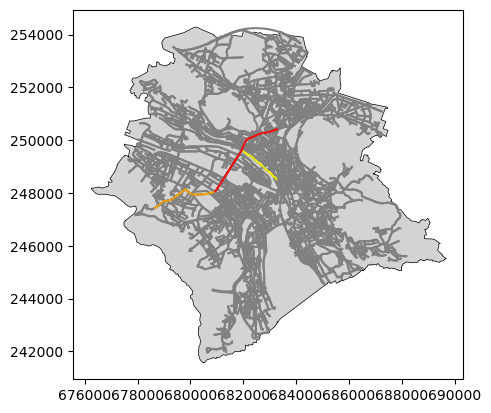

In [14]:
ax = gdf_zh.plot(color="lightgrey", linewidth=0.5, edgecolor='black')
gdf_edges.plot(color='grey', ax=ax)
gdfsRosengarten2[0].plot(color='red', ax=ax)
gdfsWasserwerk2[0].plot(color='yellow', ax=ax)
gdfsAlbisrieden2[0].plot(color='orange', ax=ax)

<AxesSubplot: >

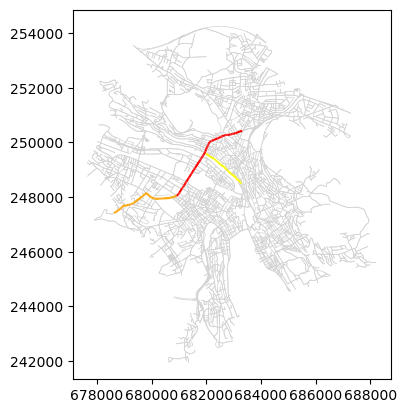

In [15]:
ax = gdf_edges.plot(color="lightgrey", linewidth=0.5, edgecolor='black')
gdfsRosengarten2[0].plot(color='red', ax=ax)
gdfsWasserwerk2[0].plot(color='yellow', ax=ax)
gdfsAlbisrieden2[0].plot(color='orange', ax=ax)

## Colormap festlegen 

In [16]:
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0, vmax=80)
mapper = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

def mystyle(edge):
    percentage = edge["properties"]["innerhalb Toleranz-Abzug"] + edge["properties"]["min 5 km/h zu schnell"] + edge["properties"]["min 10 km/h zu schnell"]

    return {
        "color": mcolors.to_hex(mapper.to_rgba(percentage)),
        "weight": 6
    }

## Nacht alle Segmente

In [17]:
pd.concat([gdfsRosengarten2[0], gdfsRosengarten2[1], gdfsWasserwerk2[0], gdfsWasserwerk2[1],gdfsAlbisrieden2[0], gdfsAlbisrieden2[1]]).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

## Rosengartenstrasse Nacht - Tag

In [18]:
pd.concat(gdfsRosengarten2).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

In [19]:
pd.concat(gdfsRosengarten3).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

## Wasserwerk Nacht - Tag

In [20]:
pd.concat(gdfsWasserwerk2).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

In [21]:
pd.concat(gdfsWasserwerk3).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

## Albisrieden Nacht - Tag

In [22]:
pd.concat(gdfsAlbisrieden2).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})

In [23]:
pd.concat(gdfsAlbisrieden3).explore(tiles="CartoDB positron", style_kwds={
    "style_function": mystyle
})